# 3/1/2019

Visualization of correlation table

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("datasets/minwage.csv")

In [3]:
df.head()

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


In [4]:
act_min_wage = pd.DataFrame()

for state, data in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = data.set_index("Year")[["Low.2018"]].rename(columns = {'Low.2018': state})
    else:
        act_min_wage = act_min_wage.join(data.set_index('Year')[['Low.2018']].rename(columns = {'Low.2018': state}))
        
act_min_wage.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,...,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,...,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,...,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,...,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,...,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


In [5]:
min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis = 1).corr()
min_wage_corr.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,...,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,...,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,...,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,...,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,...,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971


In [6]:
import matplotlib.pyplot as plt

plt.matshow(min_wage_corr)

Matplotlib has to be customized

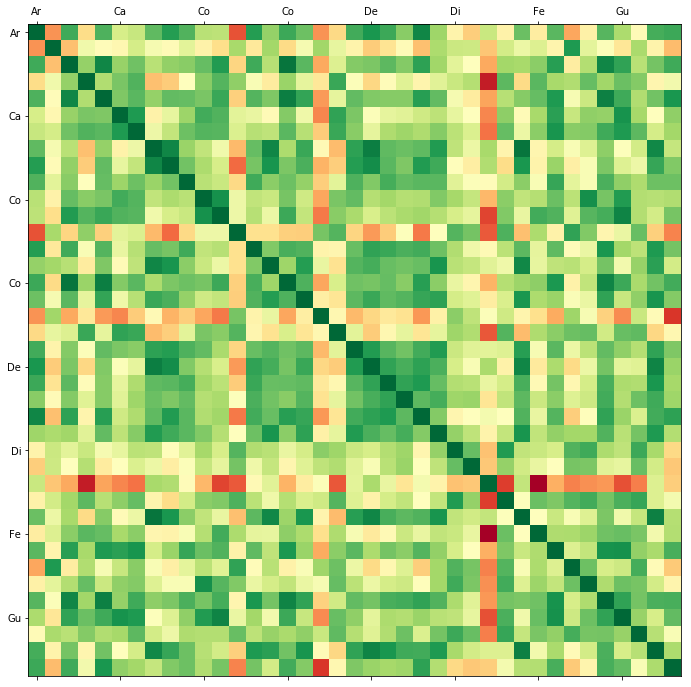

In [7]:
labels = [c[:2] for c in min_wage_corr.columns] #[:2] just get the first two letters from the state name

fig = plt.figure(figsize=(12,12)) #in order to have axes, you need subplot, in order to get subplot, you need figure
ax = fig.add_subplot(111) #all the subplots on the figure are in a '1 by 1 grid', only 1 graph

ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

ax.matshow(min_wage_corr, cmap = plt.cm.RdYlGn) #cmap is color map

The above graph doesn't show all the names, make it hard to read

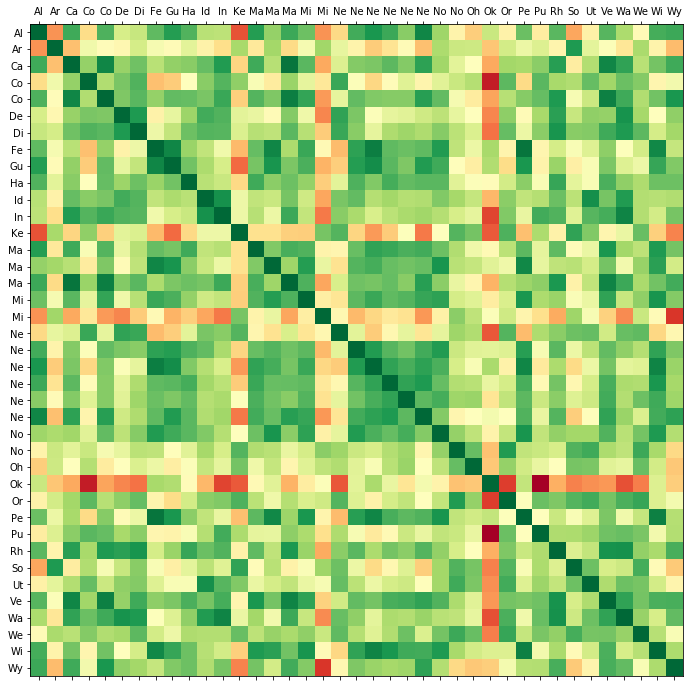

In [8]:
# %matplotlib inline #this can print the graph without plt.show()

labels = [c[:2] for c in min_wage_corr.columns] 

fig = plt.figure(figsize=(12,12)) 
ax = fig.add_subplot(111)

ax.matshow(min_wage_corr, cmap = plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

plt.show()

Many of the states have the same name like MI MI

In [9]:
df_state = pd.read_html("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")

read_html returns in a list of tables, even though it only reads in one table

In [12]:
for item in df_state:
    print(item)

          State/District Abbreviation Postal Code
0                Alabama         Ala.          AL
1                 Alaska       Alaska          AK
2                Arizona        Ariz.          AZ
3               Arkansas         Ark.          AR
4             California       Calif.          CA
5               Colorado        Colo.          CO
6            Connecticut        Conn.          CT
7               Delaware         Del.          DE
8   District of Columbia         D.C.          DC
9                Florida         Fla.          FL
10               Georgia          Ga.          GA
11                Hawaii       Hawaii          HI
12                 Idaho        Idaho          ID
13              Illinois         Ill.          IL
14               Indiana         Ind.          IN
15                  Iowa         Iowa          IA
16                Kansas        Kans.          KS
17              Kentucky          Ky.          KY
18             Louisiana          La.          LA


In [20]:
state_abbv = df_state[0]
state_abbv.head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [21]:
state_abbv.to_csv("datasets/state_abbv.csv", index = False)
state_abbv = pd.read_csv("datasets/state_abbv.csv", index_col = 0)
state_abbv.head()

,Abbreviation,Postal Code
State/District,,
Alabama,Ala.,AL
Alaska,Alaska,AK
Arizona,Ariz.,AZ
Arkansas,Ark.,AR
California,Calif.,CA


In [24]:
abbv_dict = state_abbv[["Postal Code"]].to_dict()

abbv_dict = abbv_dict["Postal Code"]
abbv_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [25]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]

KeyError: 'Federal (FLSA)'

In [26]:
abbv_dict['Federal (FLSA)'] = "FLSA"
labels = [abbv_dict[c] for c in min_wage_corr.columns]

KeyError: 'Guam'

In [27]:
abbv_dict['Guam'] = "GU"
abbv_dict['Puerto Rico'] = "PR"

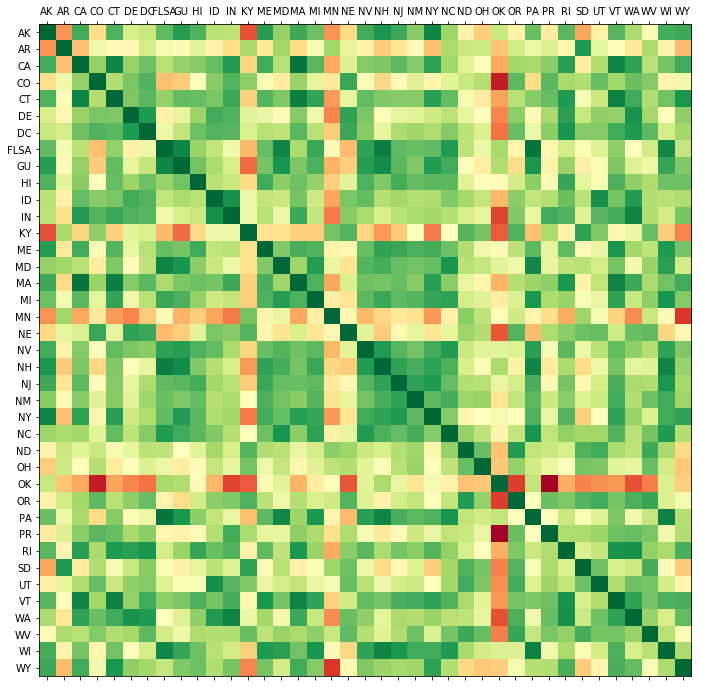

In [29]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)

ax.matshow(min_wage_corr, cmap = plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

plt.show()

# 3/1/2019

combining muliple datasets

In [3]:
import pandas as pd
import numpy as np

unemp_county = pd.read_csv("datasets/unemployment-by-county-us/output.csv")
unemp_county.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [2]:
minwage = pd.read_csv("datasets/minwage.csv")

act_min_wage = pd.DataFrame()

for state, data in minwage.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = data.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":state})
    else:
        act_min_wage = act_min_wage.join(data.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":state}))

act_min_wage.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,...,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,...,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,...,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,...,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,...,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


In [6]:
act_min_wage = act_min_wage.replace(0, np.nan).dropna(axis = 1)
act_min_wage.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,15.12,1.12,11.88,7.20,10.08,9.00,9.00,8.28,9.00,9.00,...,8.28,3.10,10.08,3.06,7.20,10.08,11.52,7.20,9.00,8.64
1969,14.33,1.07,11.26,6.83,9.56,8.53,8.53,7.85,8.53,8.53,...,7.85,2.94,9.56,2.90,6.83,9.56,10.92,6.83,8.53,8.19
1970,13.54,7.09,10.64,6.45,10.32,8.06,10.32,8.38,10.32,10.32,...,8.38,2.77,10.32,6.45,6.45,10.32,10.32,6.45,8.38,8.38
1971,12.99,6.80,10.20,6.18,9.89,7.73,9.89,8.04,9.89,9.89,...,8.04,2.66,9.89,6.18,6.18,9.89,9.89,6.18,8.04,8.04
1972,12.57,7.19,9.88,5.99,11.08,9.58,9.58,9.58,11.38,9.58,...,9.58,3.89,9.58,5.99,7.19,9.58,9.58,7.19,8.68,8.98


create a new column in pandas

In [7]:
def get_min_wage(year, state):
    try:
        return act_min_wage.loc[year][state]
    except:
        return np.NaN
    
get_min_wage(2012, "Colorado")

8.33

In [8]:
%%time

unemp_county['min_wage'] = list(map(get_min_wage, unemp_county['Year'], unemp_county["State"]))

CPU times: user 1min 43s, sys: 570 ms, total: 1min 43s
Wall time: 1min 45s


In [9]:
unemp_county.head()

,Year,Month,State,County,Rate,min_wage
0,2015,February,Mississippi,Newton County,6.1,NaN
1,2015,February,Mississippi,Panola County,9.4,NaN
2,2015,February,Mississippi,Monroe County,7.9,NaN
3,2015,February,Mississippi,Hinds County,6.1,NaN
4,2015,February,Mississippi,Kemper County,10.6,NaN


In [10]:
unemp_county[["Rate", "min_wage"]].corr()

,Rate,min_wage
Rate,1.000000,0.153047
min_wage,0.153047,1.000000


In [11]:
unemp_county[["Rate", "min_wage"]].cov()

,Rate,min_wage
Rate,9.687873,0.651586
min_wage,0.651586,1.874228


In [12]:
pres16 = pd.read_csv("datasets/pres16results.csv")
pres16.head()

,county,fips,cand,st,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump


In [13]:
len(unemp_county)

885548

In [14]:
unemp_county.head()

,Year,Month,State,County,Rate,min_wage
0,2015,February,Mississippi,Newton County,6.1,NaN
1,2015,February,Mississippi,Panola County,9.4,NaN
2,2015,February,Mississippi,Monroe County,7.9,NaN
3,2015,February,Mississippi,Hinds County,6.1,NaN
4,2015,February,Mississippi,Kemper County,10.6,NaN


In [23]:
county_2015 = unemp_county.copy()[(unemp_county['Year']==2015) & (unemp_county['Month']=="February")]

In [24]:
county_2015.head()

,Year,Month,State,County,Rate,min_wage
0,2015,February,Mississippi,Newton County,6.1,NaN
1,2015,February,Mississippi,Panola County,9.4,NaN
2,2015,February,Mississippi,Monroe County,7.9,NaN
3,2015,February,Mississippi,Hinds County,6.1,NaN
4,2015,February,Mississippi,Kemper County,10.6,NaN


In [17]:
pres16['st'].unique()

array(['US', 'CA', 'FL', 'TX', 'NY', 'PA', 'IL', 'OH', 'MI', 'NC', 'GA',
       'VA', 'NJ', 'MA', 'WI', 'MN', 'MO', 'WA', 'IN', 'CO', 'TN', 'MD',
       'SC', 'AL', 'AZ', 'LA', 'KY', 'OR', 'CT', 'IA', 'OK', 'MS', 'KS',
       'NV', 'AR', 'UT', 'NE', 'NM', 'ME', 'NH', 'WV', 'ID', 'MT', 'RI',
       'DE', 'HI', 'SD', 'ND', 'VT', 'DC', 'WY', 'AK', nan], dtype=object)

In [20]:
state_abbv = pd.read_csv("datasets/state_abbv.csv", index_col = 0)
state_abbv = state_abbv [["Postal Code"]] #[[]], otherwise it gives series
state_abbv.head()

,Postal Code
State/District,
Alabama,AL
Alaska,AK
Arizona,AZ
Arkansas,AR
California,CA


In [22]:
state_abbv_dict = state_abbv.to_dict()['Postal Code']
state_abbv_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [25]:
county_2015['State'] = county_2015['State'].map(state_abbv_dict)

In [26]:
county_2015.tail()

,Year,Month,State,County,Rate,min_wage
2797,2015,February,ME,Somerset County,8.4,7.92
2798,2015,February,ME,Oxford County,6.8,7.92
2799,2015,February,ME,Knox County,6.1,7.92
2800,2015,February,ME,Piscataquis County,7.0,7.92
2801,2015,February,ME,Aroostook County,7.2,7.92


In [28]:
print(len(county_2015))
print(len(pres16))

2802
18475


In [29]:
pres16.columns

Index(['county', 'fips', 'cand', 'st', 'pct_report', 'votes', 'total_votes',
       'pct', 'lead'],
      dtype='object')

In [30]:
pres16.rename(columns = {"county":"County", "st":"State"}, inplace = True)
pres16.head()

,County,fips,cand,State,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump


set double index

In [31]:
for df in [county_2015, pres16]:
    df.set_index(["County", "State"], inplace = True)

In [33]:
pres16 = pres16[pres16['cand']=="Donald Trump"]
pres16 = pres16[["pct"]]
pres16.dropna(inplace = True)
pres16.head()

pct
County State          
NaN    US     0.472993
       CA     0.330641
       FL     0.490640
       TX     0.525830
       NY     0.374752

In [34]:
all_together = county_2015.merge(pres16, on = ["County", "State"])
all_together.dropna(inplace = True)

In [35]:
all_together.head()

,,Year,Month,Rate,min_wage,pct
County,State,,,,,
Major County,OK,2015,February,2.6,2.11,0.864960
Pottawatomie County,OK,2015,February,4.5,2.11,0.701342
Johnston County,OK,2015,February,6.5,2.11,0.770057
Jefferson County,OK,2015,February,5.0,2.11,0.812367
Beaver County,OK,2015,February,2.8,2.11,0.888243


In [36]:
all_together.drop("Year", axis = 1, inplace = True)
all_together.head()

,,Month,Rate,min_wage,pct
County,State,,,,
Major County,OK,February,2.6,2.11,0.864960
Pottawatomie County,OK,February,4.5,2.11,0.701342
Johnston County,OK,February,6.5,2.11,0.770057
Jefferson County,OK,February,5.0,2.11,0.812367
Beaver County,OK,February,2.8,2.11,0.888243


In [37]:
all_together.corr()

,Rate,min_wage,pct
Rate,1.000000,0.186689,-0.085985
min_wage,0.186689,1.000000,-0.325036
pct,-0.085985,-0.325036,1.000000


In [38]:
all_together.cov()

,Rate,min_wage,pct
Rate,5.743199,0.683870,-0.031771
min_wage,0.683870,2.336451,-0.076602
pct,-0.031771,-0.076602,0.023772
